In [4]:
#Load basic libraries
from __future__ import print_function, division, absolute_import
import numpy as np
import matplotlib.pyplot as plt

#Import the detrend class from citlalicue
from citlalicue.detrending import detrend

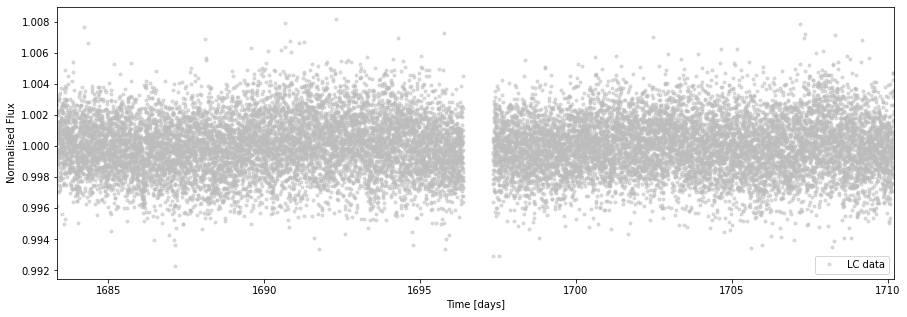

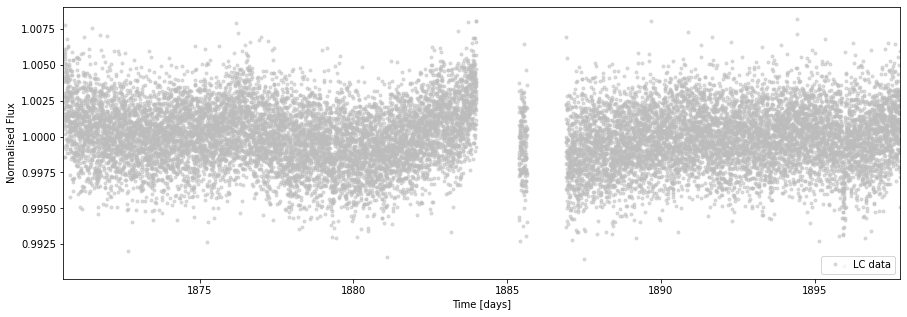

In [5]:
#Create the instance "star" using the "detrend" class
#The name of the input file in this case is "pimen.dat"
s14 = detrend("Sector_14.dat",star_name='iskra',bin=10)
s21 = detrend("Sector_21.dat",star_name='iskra',bin=10)
#Plot the data
s14.plot()
s21.plot()

In [6]:
#Add transits, so they can be removed from the detrending routines
#pars -> [T0, P, a/R*, b, Rp/R*] x Number of planets
#ldc  -> u1, u2
planet_pars = [1684.0113989,3.1274912,12.33,0.0,0.032,1686.11832,7.4932,22.1,0.0,0.039,
               1696.5856296,16.6124839,38.7279015,0.44,0.038]
ldc = [0.41,0.17]
s14.add_transits(pars=planet_pars,ldc=ldc)
s21.add_transits(pars=planet_pars,ldc=ldc)
s14.mask_transits(windows=5/24.)
s21.mask_transits(windows=5/24.)

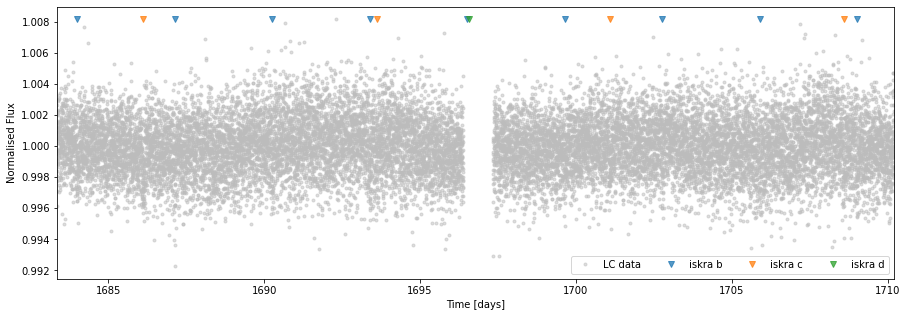

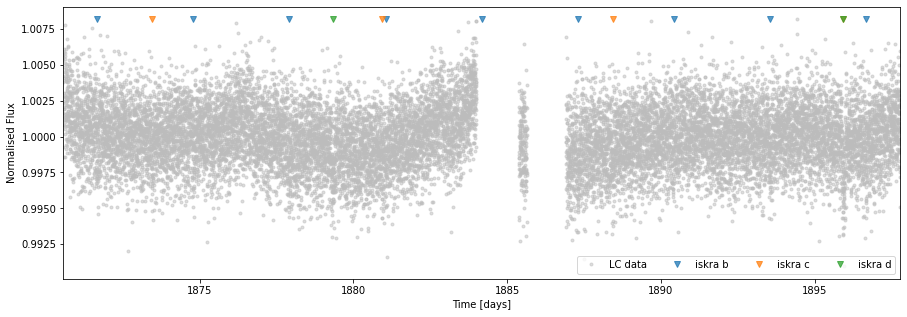

In [7]:
s14.plot()
s21.plot()

In [8]:
#Let us create a GP using a exponential kernel
s14.get_gp(Kernel="Exp",metric=1e3)
s21.get_gp(Kernel="Exp",metric=1e3)
#This creates the GP with dummy values for the GP hyperparameters

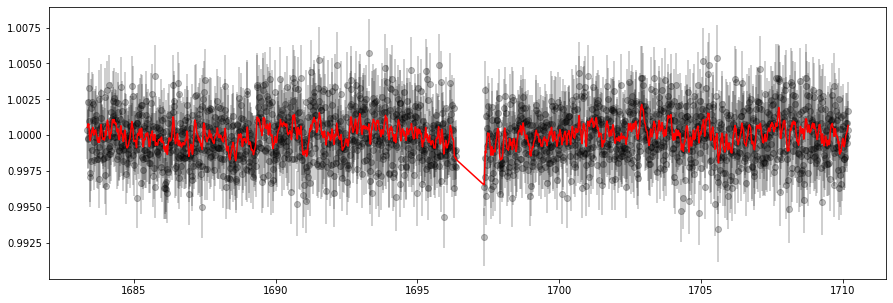

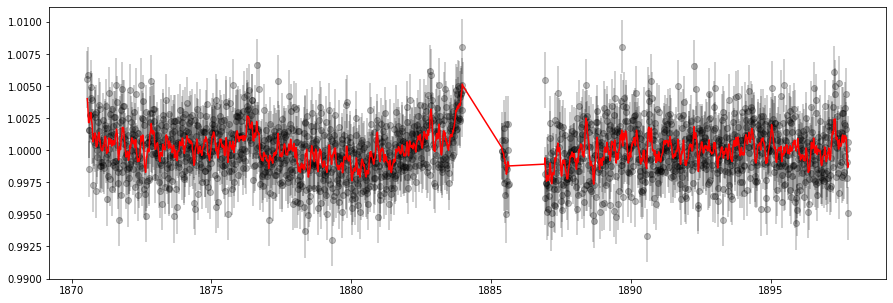

In [9]:
s14.predict()
s21.predict()

In [10]:
s14.optimize()
s21.optimize()

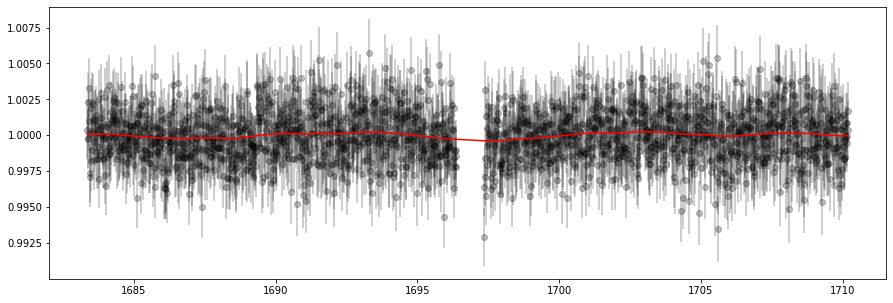

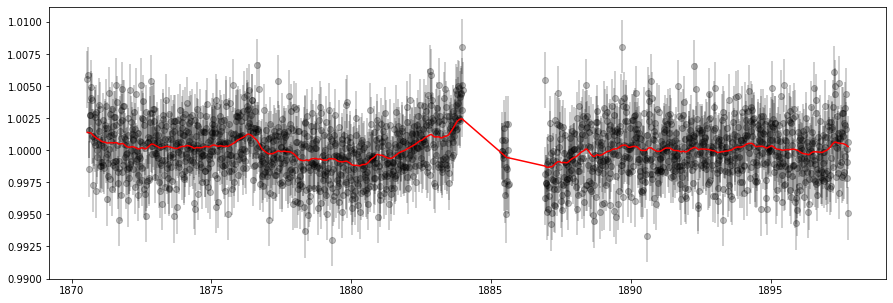

In [11]:
s14.predict()
s21.predict()

In [12]:
#This step might take long time to excecute, be patient!
s14.detrend('gp')
#s21.detrend()
#Now we have a file called *detrend.dat file with the detrended light curve

Saving Sector_14_detrended.dat file


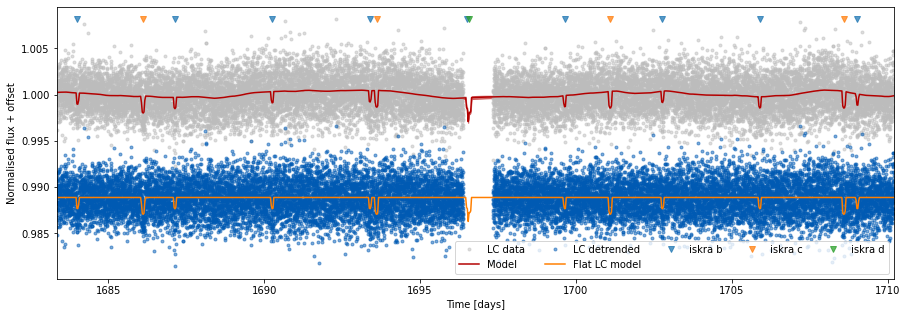

In [13]:
s14.plot(save=True,fname='s14_lc.pdf')
#s21.plot(save=True,fname='s21_lc.pdf')

(1895.6, 1896.2)

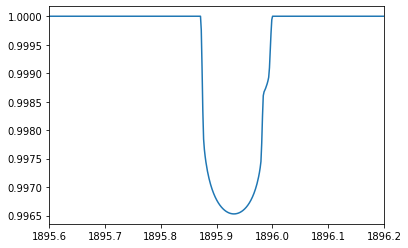

In [14]:
plt.plot(s21.time,s21.flux_planet)
plt.xlim(1895.6,1896.2)

Saving Sector_14_detrended_cut.dat file
Saving Sector_21_cut.dat file


AttributeError: 'detrend' object has no attribute 'flux_detrended_cut'

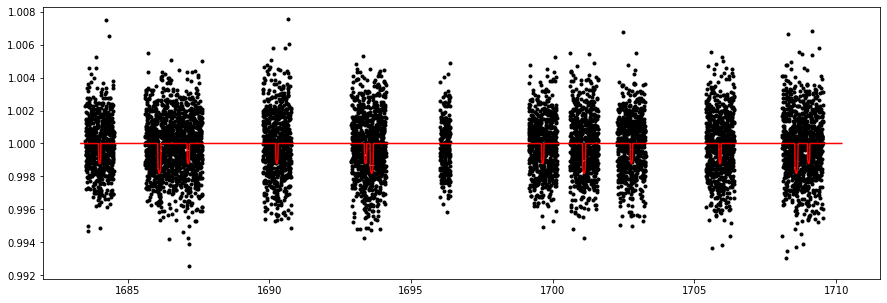

In [15]:
s14.cut_transits()
s21.cut_transits()
#Now we have cut the transits and they are stored in the *_detrended_cut.dat file
#Let us plot how the new data set looks like
plt.figure(figsize=(15,5))
plt.plot(s14.time_cut,s14.flux_detrended_cut,'k.')
plt.plot(s14.time,s14.flux_planet,'r')
plt.plot(s21.time_cut,s21.flux_detrended_cut,'k.')
plt.plot(s21.time,s21.flux_planet,'r')